In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import numpy as np
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error


from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [2]:
NVDA_stock_data=pd.read_csv("NVDA (1).csv", index_col='Date')
NVDA_stock_data_test=pd.read_csv("NVDA (2).csv", index_col='Date')

In [3]:
NVDA_y_target = NVDA_stock_data.iloc[:, 0:4]
NVDA_X_feat = NVDA_stock_data.iloc[:, 0:3]

In [4]:
NVDA_y_target_test = NVDA_stock_data_test.iloc[-5:,4]


In [5]:
print(NVDA_y_target_test)

Date
2024-04-22    795.179993
2024-04-23    824.229980
2024-04-24    796.770020
2024-04-25    826.320007
2024-04-26    877.349976
Name: Adj Close, dtype: float64


In [6]:
scaler= StandardScaler()
# Fit and transform the feature data
NVDA_X_ft = scaler.fit_transform(NVDA_X_feat)
# Convert the transformed feature data back to a pandas DataFrame
NVDA_X_feat = pd.DataFrame(data=NVDA_X_ft, columns=NVDA_X_feat.columns, index=NVDA_X_feat.index)


In [7]:

# Fit and transform the target data
# Since `NVDA_y_target` is a pandas Series, reshape it to a 2D array to fit and transform

NVDA_y_t= scaler.fit_transform(NVDA_y_target)
# Convert the transformed target data back to a pandas Series
NVDA_y_target = pd.DataFrame(data=NVDA_y_t, columns=NVDA_y_target.columns, index=NVDA_y_target.index)



In [8]:
test_array=NVDA_y_target_test.values.reshape(-1, 1)
print(test_array)
a=scaler.fit_transform(test_array)
test_array=a

[[795.179993]
 [824.22998 ]
 [796.77002 ]
 [826.320007]
 [877.349976]]


In [9]:
test_array

array([[-0.96790584],
       [ 0.00874056],
       [-0.91444991],
       [ 0.07900625],
       [ 1.79460894]])

In [10]:
test_array=[-0.96790584,
        0.00874056,
       -0.91444991,
        0.07900625, 
        1.79460894]

In [11]:
unscaled_test_array=NVDA_y_target_test.values.reshape(-1)

In [12]:
NVDA_X_feat

,Open,High,Low
Date,,,
2019-04-22,-0.944909,-0.945675,-0.942756
2019-04-23,-0.939964,-0.941906,-0.936491
2019-04-24,-0.937133,-0.940734,-0.936450
2019-04-25,-0.939219,-0.943877,-0.943281
2019-04-26,-0.951194,-0.956609,-0.957664
...,...,...,...
2024-04-16,3.487430,3.496644,3.563489
2024-04-17,3.590762,3.531643,3.446548
2024-04-18,3.408157,3.393937,3.360917


In [14]:
length = 10
batch_size = 1


train_size5 = int(0.95 * len(NVDA_stock_data))
train_X_feat5 = NVDA_X_feat.iloc[train_size5-100:train_size5, 0:3]
train_y_target5 = NVDA_y_target.iloc[train_size5-100:train_size5, 0:4]
val_X_feat5 = NVDA_X_feat.iloc[train_size5:, 0:3]
val_y_target5 = NVDA_y_target.iloc[train_size5:, 0:4]


train_generator5 = TimeseriesGenerator(train_X_feat5.values, train_y_target5.values, length=length, batch_size=batch_size)
val_generator5 = TimeseriesGenerator(val_X_feat5.values, val_y_target5.values, length=length, batch_size=batch_size)


model5 = Sequential([
    LSTM(64, input_shape=(length, 3), return_sequences=True),
    LSTM(32, return_sequences=False), 
    Dense(4)  
])


model5.compile(optimizer='adam', loss='mse')


model5.fit(train_generator5, validation_data=val_generator5, epochs=10)

Epoch 1/10
90/90 [==============================] - 5s 16ms/step - loss: 0.2417 - val_loss: 3.7776
Epoch 2/10
90/90 [==============================] - 1s 8ms/step - loss: 0.0420 - val_loss: 3.3640
Epoch 3/10
90/90 [==============================] - 1s 9ms/step - loss: 0.0422 - val_loss: 2.6990
Epoch 4/10
90/90 [==============================] - 1s 9ms/step - loss: 0.0438 - val_loss: 3.0223
Epoch 5/10
90/90 [==============================] - 1s 9ms/step - loss: 0.0317 - val_loss: 2.3292
Epoch 6/10
90/90 [==============================] - 1s 9ms/step - loss: 0.0269 - val_loss: 1.7148
Epoch 7/10
90/90 [==============================] - 1s 8ms/step - loss: 0.0187 - val_loss: 1.2734
Epoch 8/10
90/90 [==============================] - 1s 9ms/step - loss: 0.0186 - val_loss: 1.0593
Epoch 9/10
90/90 [==============================] - 1s 9ms/step - loss: 0.0144 - val_loss: 0.8642
Epoch 10/10
90/90 [==============================] - 1s 9ms/step - loss: 0.0118 - val_loss: 0.7394


In [15]:
input_data = NVDA_X_feat.iloc[-10: , :3].values
print(input_data)

[[3.5421035  3.47091381 3.39521359]
 [3.35158717 3.45839519 3.43321677]
 [3.54091157 3.63626809 3.61117189]
 [3.66440037 3.60622301 3.64458332]
 [3.63183479 3.62955586 3.55602053]
 [3.48743044 3.49664394 3.56348855]
 [3.59076237 3.53164321 3.44654805]
 [3.40815692 3.39393706 3.36091724]
 [3.30953912 3.29453266 2.98498188]
 [3.03649794 3.04426427 3.02890369]]


In [31]:
input_data = NVDA_X_feat.iloc[-10: , :3].values
print(input_data.shape)
print(input_data)
print(NVDA_stock_data.shape)
input_data = input_data.reshape((1, 10, 3))
print(input_data.shape)
print(input_data)

(10, 3)
[[1.21559572 1.21811032 1.2396462 ]
 [1.2097553  1.21199071 1.23384893]
 [1.20426965 1.20623994 1.22840309]
 [1.19911647 1.20083559 1.22328722]
 [1.19427538 1.19575655 1.21848011]
 [1.18972659 1.19098294 1.21396327]
 [1.18545163 1.1864959  1.20971811]
 [1.18143344 1.18227768 1.20572746]
 [1.17765617 1.17831182 1.20197594]
 [1.17410433 1.17458248 1.19844842]]
(1260, 6)
(1, 10, 3)
[[[1.21559572 1.21811032 1.2396462 ]
  [1.2097553  1.21199071 1.23384893]
  [1.20426965 1.20623994 1.22840309]
  [1.19911647 1.20083559 1.22328722]
  [1.19427538 1.19575655 1.21848011]
  [1.18972659 1.19098294 1.21396327]
  [1.18545163 1.1864959  1.20971811]
  [1.18143344 1.18227768 1.20572746]
  [1.17765617 1.17831182 1.20197594]
  [1.17410433 1.17458248 1.19844842]]]


In [32]:
def shift_left(array, pred):
    for i in range(9):
        array[0,i,]= array[0,i+1,]
    array[0,-1,]=pred[0,:3]
    return array


In [33]:
pred=model5.predict(input_data)
pred[0,:3]

1/1 [==============================] - 0s 22ms/step


array([1.1707641, 1.1710753, 1.195131 ], dtype=float32)

In [34]:
print(input_data)

[[[1.21559572 1.21811032 1.2396462 ]
  [1.2097553  1.21199071 1.23384893]
  [1.20426965 1.20623994 1.22840309]
  [1.19911647 1.20083559 1.22328722]
  [1.19427538 1.19575655 1.21848011]
  [1.18972659 1.19098294 1.21396327]
  [1.18545163 1.1864959  1.20971811]
  [1.18143344 1.18227768 1.20572746]
  [1.17765617 1.17831182 1.20197594]
  [1.17410433 1.17458248 1.19844842]]]


In [35]:
predictions=np.array([])


for i in range(4):
    pred = model5.predict(input_data)
    predictions = np.append(predictions,pred[0,3])
    print(pred[0,:3])
    input_data=shift_left(input_data,pred)
    print(input_data)
    print(predictions)

1/1 [==============================] - 0s 22ms/step
[1.1707641 1.1710753 1.195131 ]
[[[1.2097553  1.21199071 1.23384893]
  [1.20426965 1.20623994 1.22840309]
  [1.19911647 1.20083559 1.22328722]
  [1.19427538 1.19575655 1.21848011]
  [1.18972659 1.19098294 1.21396327]
  [1.18545163 1.1864959  1.20971811]
  [1.18143344 1.18227768 1.20572746]
  [1.17765617 1.17831182 1.20197594]
  [1.17410433 1.17458248 1.19844842]
  [1.17076409 1.17107534 1.19513094]]]
[1.18043447]
1/1 [==============================] - 0s 26ms/step
[1.1676226 1.1677761 1.1920102]
[[[1.20426965 1.20623994 1.22840309]
  [1.19911647 1.20083559 1.22328722]
  [1.19427538 1.19575655 1.21848011]
  [1.18972659 1.19098294 1.21396327]
  [1.18545163 1.1864959  1.20971811]
  [1.18143344 1.18227768 1.20572746]
  [1.17765617 1.17831182 1.20197594]
  [1.17410433 1.17458248 1.19844842]
  [1.17076409 1.17107534 1.19513094]
  [1.16762257 1.16777611 1.19201016]]]
[1.18043447 1.177037  ]
1/1 [==============================] - 0s 21ms/step

In [36]:
new_shape = (len(predictions), 1)
predictions_2d = predictions.reshape(new_shape)
predictions_unscaled= scaler.inverse_transform(predictions_2d)

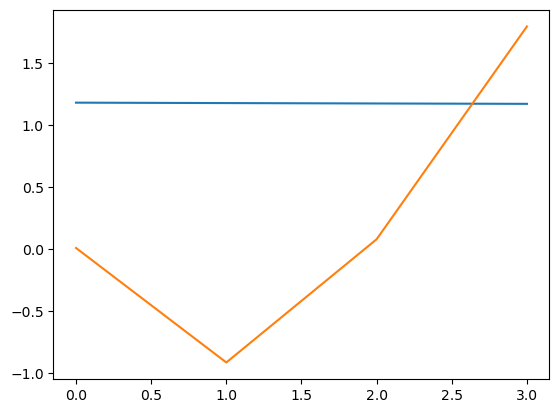

In [37]:

plt.plot(range(4), predictions, label="")
plt.plot(range(4), test_array[1:], label="")

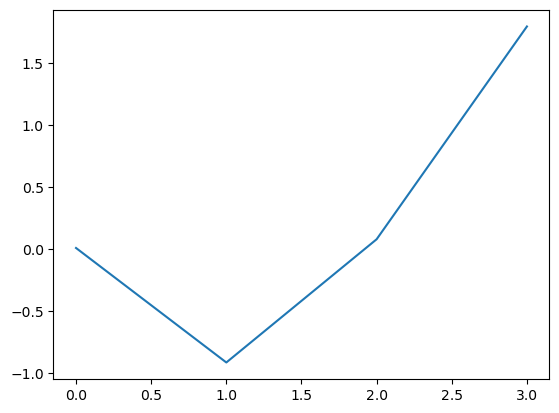

In [39]:
plt.plot(range(4), test_array[1:], label="")

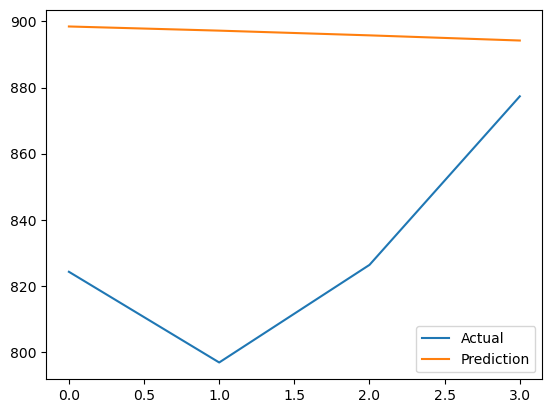

In [24]:

plt.plot(range(4), unscaled_test_array[1:], label="Actual")
plt.plot(range(4), predictions_unscaled, label="Prediction")
plt.legend()